In [1]:
#!pip install statistical_clear_sky

In [2]:
# go to mosek.com and enroll in trial, follow instructions and place license file in specified location
# !pip install Mosek

In [3]:
import sys
sys.path.append('solar-data-tools-master')

import mosek
import pandas as pd
from statistical_clear_sky import IterativeFitting
from solardatatools import DataHandler
from utils import get_data

In [4]:
df = pd.read_csv('garage_data.csv')
del df['date.1']

In [5]:
df['date'] = pd.to_datetime(df['date'])
df.index = df['date']
df.head()

,date,A_max_spaces,A_percent_full,A_spaces_filled,A_spaces_left,B_max_spaces,B_percent_full,B_spaces_filled,B_spaces_left,C_max_spaces,...,H_spaces_filled,H_spaces_left,I_max_spaces,I_percent_full,I_spaces_filled,I_spaces_left,Libra_max_spaces,Libra_percent_full,Libra_spaces_filled,Libra_spaces_left
date,,,,,,,,,,,,,,,,,,,,,
2019-01-02 03:00:49.044984,2019-01-02 03:00:49.044984,1623,0.00,0,1623,1259,51.31,646,613,1852,...,0,1284,1231,0.00,0,1231,1007,6.26,63,944
2019-01-02 04:01:23.357748,2019-01-02 04:01:23.357748,1623,0.00,0,1623,1259,51.31,646,613,1852,...,0,1284,1231,0.00,0,1231,1007,6.45,65,942
2019-01-02 05:01:07.382274,2019-01-02 05:01:07.382274,1623,0.00,0,1623,1259,51.71,651,608,1852,...,0,1284,1231,0.08,1,1230,1007,6.36,64,943
2019-01-02 06:00:38.179240,2019-01-02 06:00:38.179240,1623,0.00,0,1623,1259,51.71,651,608,1852,...,15,1269,1231,0.24,3,1228,1007,6.45,65,942
2019-01-02 07:01:51.548626,2019-01-02 07:01:51.548626,1623,0.37,6,1617,1259,52.34,659,600,1852,...,33,1251,1231,1.30,16,1215,1007,7.65,77,930


In [6]:
df.index = df['date'].dt.floor('h')
del df['date']
df

,A_max_spaces,A_percent_full,A_spaces_filled,A_spaces_left,B_max_spaces,B_percent_full,B_spaces_filled,B_spaces_left,C_max_spaces,C_percent_full,...,H_spaces_filled,H_spaces_left,I_max_spaces,I_percent_full,I_spaces_filled,I_spaces_left,Libra_max_spaces,Libra_percent_full,Libra_spaces_filled,Libra_spaces_left
date,,,,,,,,,,,,,,,,,,,,,
2019-01-02 03:00:00,1623,0.00,0,1623,1259,51.31,646,613,1852,0.00,...,0,1284,1231,0.00,0,1231,1007,6.26,63,944
2019-01-02 04:00:00,1623,0.00,0,1623,1259,51.31,646,613,1852,0.00,...,0,1284,1231,0.00,0,1231,1007,6.45,65,942
2019-01-02 05:00:00,1623,0.00,0,1623,1259,51.71,651,608,1852,0.00,...,0,1284,1231,0.08,1,1230,1007,6.36,64,943
2019-01-02 06:00:00,1623,0.00,0,1623,1259,51.71,651,608,1852,0.00,...,15,1269,1231,0.24,3,1228,1007,6.45,65,942
2019-01-02 07:00:00,1623,0.37,6,1617,1259,52.34,659,600,1852,0.16,...,33,1251,1231,1.30,16,1215,1007,7.65,77,930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-09 21:00:00,1623,100.00,1623,0,1259,11.12,140,1119,1852,0.00,...,794,490,1231,2.84,35,1196,1007,56.70,571,436
2021-04-09 22:00:00,1623,100.00,1623,0,1259,11.12,140,1119,1852,0.00,...,797,487,1231,2.52,31,1200,1007,58.69,591,416
2021-04-09 23:00:00,1623,100.00,1623,0,1259,11.12,140,1119,1852,0.00,...,803,481,1231,1.95,24,1207,1007,61.17,616,391


In [7]:
# df = df[df.index.dayofweek < 5]

In [8]:
#df = df.reindex(pd.date_range("2011-01-01", "2011-10-31"), fill_value="NaN")
# cols = df.columns.tolist()
# cols.remove('date')
# df[cols] = df[cols].interpolate(method='linear')#, order=2)

#df.columns
#df.drop_duplicates()
df = df[~df.index.duplicated()]
df = df.asfreq(freq='15Min')
cols = df.columns.tolist()
df[cols] = df[cols].interpolate(method='linear')#, order=2)

df

,A_max_spaces,A_percent_full,A_spaces_filled,A_spaces_left,B_max_spaces,B_percent_full,B_spaces_filled,B_spaces_left,C_max_spaces,C_percent_full,...,H_spaces_filled,H_spaces_left,I_max_spaces,I_percent_full,I_spaces_filled,I_spaces_left,Libra_max_spaces,Libra_percent_full,Libra_spaces_filled,Libra_spaces_left
date,,,,,,,,,,,,,,,,,,,,,
2019-01-02 03:00:00,1623.0,0.0,0.0,1623.0,1259.0,51.31,646.0,613.0,1852.0,0.0,...,0.00,1284.00,1231.0,0.0,0.0,1231.0,1007.0,6.2600,63.00,944.00
2019-01-02 03:15:00,1623.0,0.0,0.0,1623.0,1259.0,51.31,646.0,613.0,1852.0,0.0,...,0.00,1284.00,1231.0,0.0,0.0,1231.0,1007.0,6.3075,63.50,943.50
2019-01-02 03:30:00,1623.0,0.0,0.0,1623.0,1259.0,51.31,646.0,613.0,1852.0,0.0,...,0.00,1284.00,1231.0,0.0,0.0,1231.0,1007.0,6.3550,64.00,943.00
2019-01-02 03:45:00,1623.0,0.0,0.0,1623.0,1259.0,51.31,646.0,613.0,1852.0,0.0,...,0.00,1284.00,1231.0,0.0,0.0,1231.0,1007.0,6.4025,64.50,942.50
2019-01-02 04:00:00,1623.0,0.0,0.0,1623.0,1259.0,51.31,646.0,613.0,1852.0,0.0,...,0.00,1284.00,1231.0,0.0,0.0,1231.0,1007.0,6.4500,65.00,942.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-10 00:00:00,1623.0,0.0,0.0,1623.0,1259.0,11.12,140.0,1119.0,1852.0,0.0,...,0.00,1284.00,1231.0,0.0,0.0,1231.0,1007.0,63.2600,637.00,370.00
2021-04-10 00:15:00,1623.0,0.0,0.0,1623.0,1259.0,11.12,140.0,1119.0,1852.0,0.0,...,0.25,1283.75,1231.0,0.0,0.0,1231.0,1007.0,63.5325,639.75,367.25
2021-04-10 00:30:00,1623.0,0.0,0.0,1623.0,1259.0,11.12,140.0,1119.0,1852.0,0.0,...,0.50,1283.50,1231.0,0.0,0.0,1231.0,1007.0,63.8050,642.50,364.50


In [9]:
#df = df.iloc[0:24*4*100] # 24*4*400

In [10]:
df

,A_max_spaces,A_percent_full,A_spaces_filled,A_spaces_left,B_max_spaces,B_percent_full,B_spaces_filled,B_spaces_left,C_max_spaces,C_percent_full,...,H_spaces_filled,H_spaces_left,I_max_spaces,I_percent_full,I_spaces_filled,I_spaces_left,Libra_max_spaces,Libra_percent_full,Libra_spaces_filled,Libra_spaces_left
date,,,,,,,,,,,,,,,,,,,,,
2019-01-02 03:00:00,1623.0,0.0,0.0,1623.0,1259.0,51.31,646.0,613.0,1852.0,0.0,...,0.00,1284.00,1231.0,0.0,0.0,1231.0,1007.0,6.2600,63.00,944.00
2019-01-02 03:15:00,1623.0,0.0,0.0,1623.0,1259.0,51.31,646.0,613.0,1852.0,0.0,...,0.00,1284.00,1231.0,0.0,0.0,1231.0,1007.0,6.3075,63.50,943.50
2019-01-02 03:30:00,1623.0,0.0,0.0,1623.0,1259.0,51.31,646.0,613.0,1852.0,0.0,...,0.00,1284.00,1231.0,0.0,0.0,1231.0,1007.0,6.3550,64.00,943.00
2019-01-02 03:45:00,1623.0,0.0,0.0,1623.0,1259.0,51.31,646.0,613.0,1852.0,0.0,...,0.00,1284.00,1231.0,0.0,0.0,1231.0,1007.0,6.4025,64.50,942.50
2019-01-02 04:00:00,1623.0,0.0,0.0,1623.0,1259.0,51.31,646.0,613.0,1852.0,0.0,...,0.00,1284.00,1231.0,0.0,0.0,1231.0,1007.0,6.4500,65.00,942.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-10 00:00:00,1623.0,0.0,0.0,1623.0,1259.0,11.12,140.0,1119.0,1852.0,0.0,...,0.00,1284.00,1231.0,0.0,0.0,1231.0,1007.0,63.2600,637.00,370.00
2021-04-10 00:15:00,1623.0,0.0,0.0,1623.0,1259.0,11.12,140.0,1119.0,1852.0,0.0,...,0.25,1283.75,1231.0,0.0,0.0,1231.0,1007.0,63.5325,639.75,367.25
2021-04-10 00:30:00,1623.0,0.0,0.0,1623.0,1259.0,11.12,140.0,1119.0,1852.0,0.0,...,0.50,1283.50,1231.0,0.0,0.0,1231.0,1007.0,63.8050,642.50,364.50


In [11]:
dh = DataHandler(df)
dh.run_pipeline(power_col='C_percent_full')
dh.report()

Done.
Restarting the pipeline...
Done.
Restarting the pipeline...
Done.
Restarting the pipeline...
total time: 8.85 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              0.28s
Cleaning                   7.11s
Filtering/Summarizing      1.46s
    Data quality           0.20s
    Clear day detect       0.36s
    Clipping detect        0.26s
    Capacity change detect 0.64s

Length:                2.27 years
Capacity estimate:     88.76 kW
Data sampling:         15 minute
Data quality score:    39.5%
Data clearness score:  5.3%
Inverter clipping:     True
Time shifts corrected: False
Time zone correction:  -4 hours


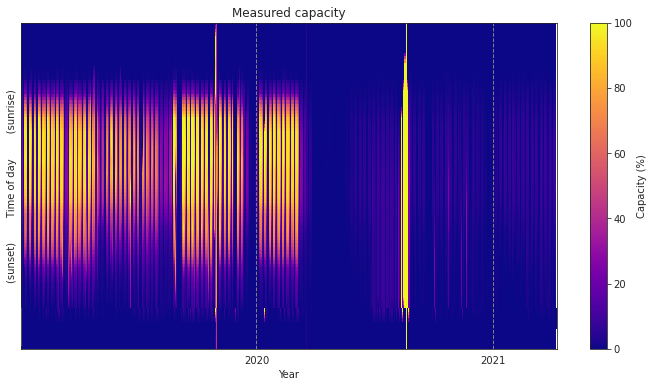

In [12]:
fig = dh.plot_heatmap(matrix='raw')

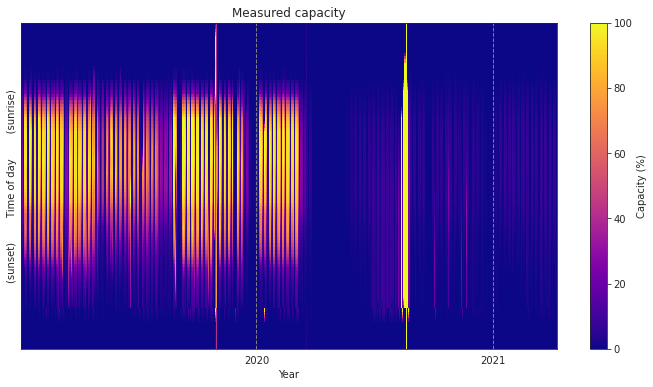

In [13]:
dh.plot_heatmap(matrix='filled');

In [14]:
scsf = IterativeFitting(data_handler_obj=dh)

In [15]:
scsf.execute()

----------------------
SCSF Problem Setup
----------------------
Matrix Size: 96 x 830 = 79680 power measurements
Sparsity: 94.94%
4031 non-zero measurements under clear conditions
Model size: 96 x 6 + 6 x 830 = 5556 parameters


----------------------
Algorithm Iterations
----------------------
Starting at Objective: 9.263e+06, f1: 2.281e+03, f2: 4.619e+02, f3: 7.180e+06, f4: 2.081e+06
    Minimizing left matrix
    Minimizing right matrix
1 - Objective: 5.956e+03, f1: 4.423e+03, f2: 8.708e+01, f3: 1.446e+03, f4: 3.910e-09
Caution: residuals increased
    Minimizing left matrix
    Minimizing right matrix
2 - Objective: 5.317e+03, f1: 4.014e+03, f2: 7.164e+01, f3: 1.231e+03, f4: 5.618e-09
Caution: residuals increased
    Minimizing left matrix
    Minimizing right matrix
3 - Objective: 5.188e+03, f1: 3.825e+03, f2: 7.874e+01, f3: 1.284e+03, f4: 4.450e-09
Caution: residuals increased
    Minimizing left matrix
    Minimizing right matrix
4 - Objective: 5.199e+03, f1: 3.753e+03, f2: 7.5

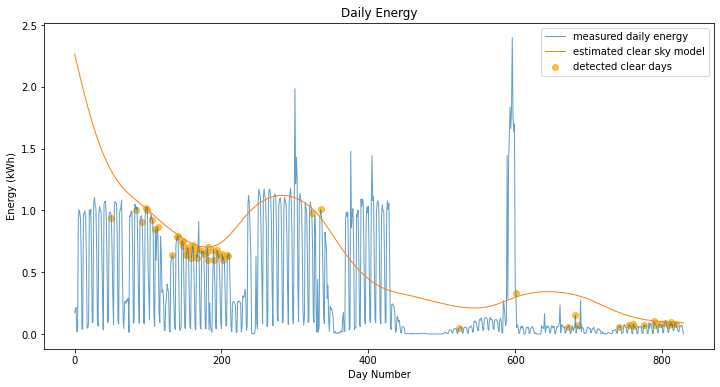

In [16]:
import matplotlib.pyplot as plt
scsf.plot_energy(show_clear=True, show_days=True, scale_power=True)
plt.title('Daily Energy')
plt.xlabel('Day Number')
plt.ylabel('Energy (kWh)');

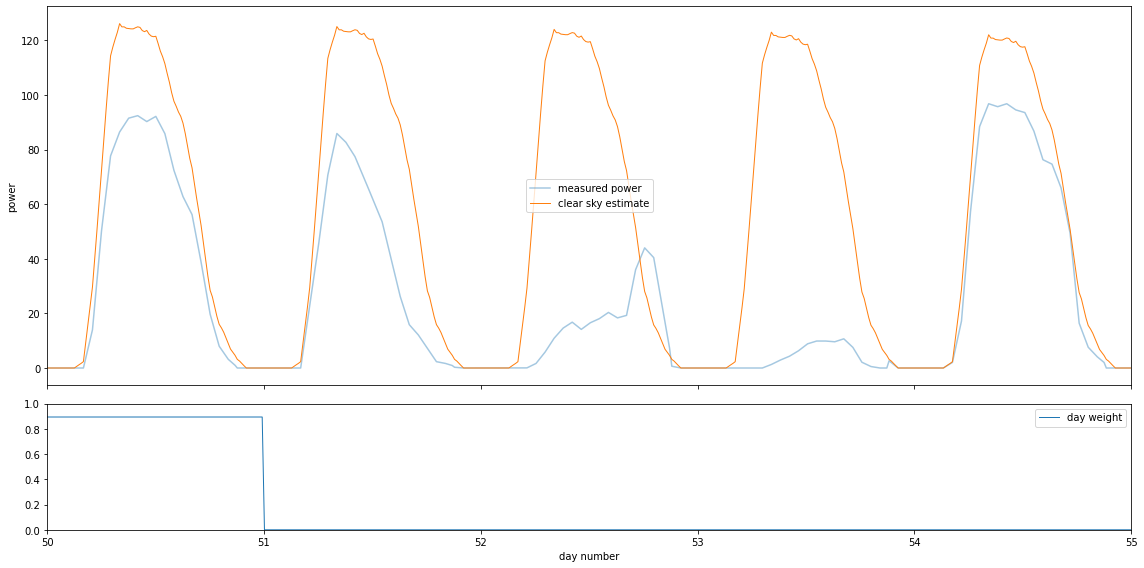

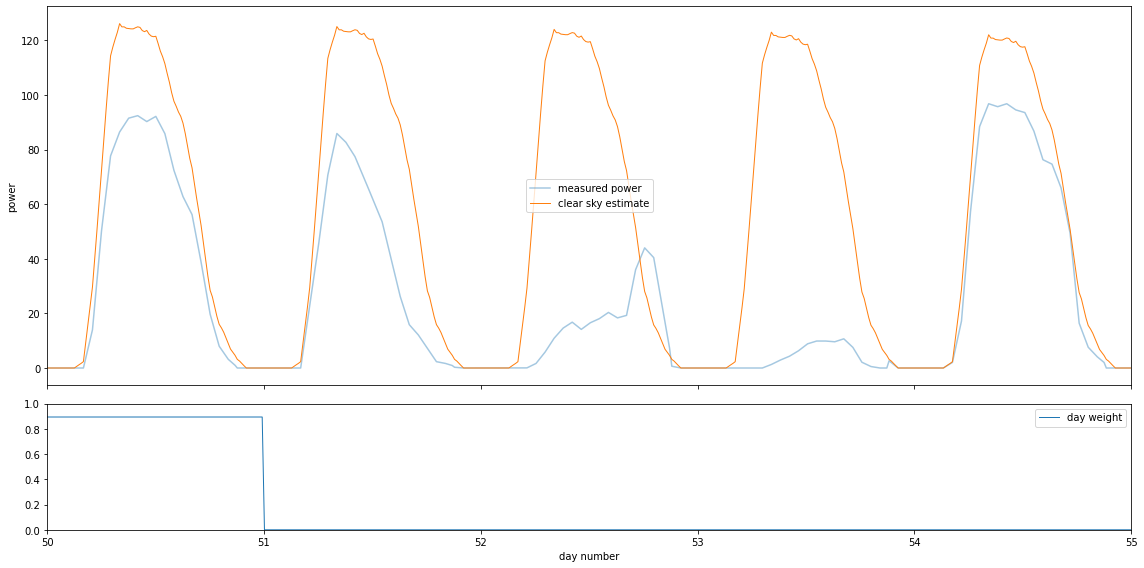

In [17]:
scsf.plot_time_series_with_weights(start_day=50)

In [18]:
dh.fit_statistical_clear_sky_model()

----------------------
SCSF Problem Setup
----------------------
Matrix Size: 96 x 830 = 79680 power measurements
Sparsity: 94.94%
4031 non-zero measurements under clear conditions
Model size: 96 x 6 + 6 x 830 = 5556 parameters


----------------------
Algorithm Iterations
----------------------
Starting at Objective: 9.263e+06, f1: 2.281e+03, f2: 4.619e+02, f3: 7.180e+06, f4: 2.081e+06
    Minimizing left matrix
    Minimizing right matrix
1 - Objective: 5.956e+03, f1: 4.423e+03, f2: 8.708e+01, f3: 1.446e+03, f4: 3.910e-09
Caution: residuals increased
    Minimizing left matrix
    Minimizing right matrix
2 - Objective: 5.317e+03, f1: 4.014e+03, f2: 7.164e+01, f3: 1.231e+03, f4: 5.618e-09
Caution: residuals increased
    Minimizing left matrix
    Minimizing right matrix
3 - Objective: 5.188e+03, f1: 3.825e+03, f2: 7.874e+01, f3: 1.284e+03, f4: 4.450e-09
Caution: residuals increased
    Minimizing left matrix
    Minimizing right matrix
4 - Objective: 5.199e+03, f1: 3.753e+03, f2: 7.5

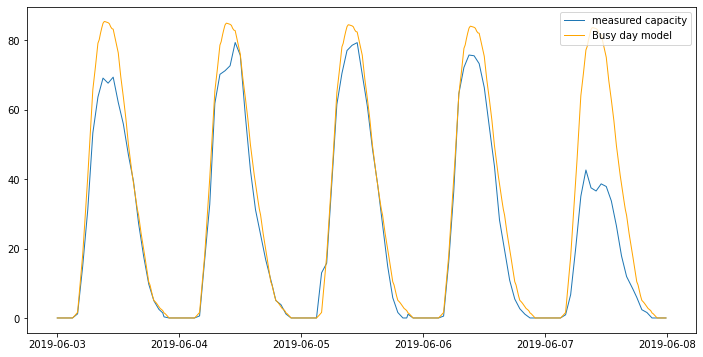

In [19]:
dh.plot_daily_signals(start_day=152, show_legend=True);

In [20]:
dh.find_clear_times()

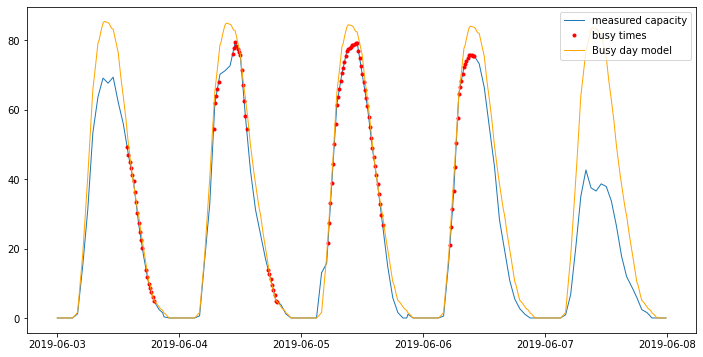

In [21]:
dh.plot_daily_signals(start_day=152, boolean_mask=dh.boolean_masks.clear_times, mask_label='busy times',show_legend=True);

In [23]:
# TODO: Estimate at time X:XX given few points about day
dh.data_frame

,A_max_spaces,A_percent_full,A_spaces_filled,A_spaces_left,B_max_spaces,B_percent_full,B_spaces_filled,B_spaces_left,C_max_spaces,C_percent_full,...,H_spaces_filled,H_spaces_left,I_max_spaces,I_percent_full,I_spaces_filled,I_spaces_left,Libra_max_spaces,Libra_percent_full,Libra_spaces_filled,Libra_spaces_left
2019-01-02 00:00:00,1623.0,0.0,0.0,1623.0,1259.0,51.31,646.0,613.0,1852.0,0.0,...,0.0,1284.0,1231.0,0.0,0.0,1231.0,1007.0,6.2600,63.0,944.0
2019-01-02 00:15:00,1623.0,0.0,0.0,1623.0,1259.0,51.31,646.0,613.0,1852.0,0.0,...,0.0,1284.0,1231.0,0.0,0.0,1231.0,1007.0,6.3075,63.5,943.5
2019-01-02 00:30:00,1623.0,0.0,0.0,1623.0,1259.0,51.31,646.0,613.0,1852.0,0.0,...,0.0,1284.0,1231.0,0.0,0.0,1231.0,1007.0,6.3550,64.0,943.0
2019-01-02 00:45:00,1623.0,0.0,0.0,1623.0,1259.0,51.31,646.0,613.0,1852.0,0.0,...,0.0,1284.0,1231.0,0.0,0.0,1231.0,1007.0,6.4025,64.5,942.5
2019-01-02 01:00:00,1623.0,0.0,0.0,1623.0,1259.0,51.31,646.0,613.0,1852.0,0.0,...,0.0,1284.0,1231.0,0.0,0.0,1231.0,1007.0,6.4500,65.0,942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-10 22:45:00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0
2021-04-10 23:00:00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0
2021-04-10 23:15:00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0
2021-04-10 23:30:00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0
